In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
start  ='2010-01-01'
end =date.today().strftime("%Y-%m-%d")
df=data.DataReader('AAPL','yahoo',start,end)
df =df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array
x_train=[]
y_train=[]
for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train,y_train=np.array(x_train), np.array(y_train)
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
                              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
65/65 [==============================] - 30s 346ms/step - loss: 0.0268
Epoch 2/50
65/65 [==============================] - 22s 333ms/step - loss: 0.0069
Epoch 3/50
65/65 [==============================] - 22s 332ms/step - loss: 0.0065
Epoch 4/50
65/65 [==============================] - 21s 325ms/step - loss: 0.0048
Epoch 5/50
65/65 [==============================] - 21s 322ms/step - loss: 0.0050
Epoch 6/50
65/65 [==============================] - 21s 327ms/step - loss: 0.0047
Epoch 7/50
65/65 [==============================] - 21s 324ms/step - loss: 0.0044
Epoch 8/50
65/65 [==============================] - 22s 335ms/step - loss: 0.0041
Epoch 9/50
65/65 [==============================] - 21s 331ms/step - loss: 0.0047
Epoch 10/50
65/65 [==============================] - 21s 326ms/step - loss: 0.0041
Epoch 11/50
65/65 [==============================] - 21s 322ms/step - loss: 0.0038
Epoch 12/50
65/65 [==============================] - 18s 271ms/step - loss: 0.0035
Epoch 13/50
6

In [3]:
model.save('keras_model1.h5')


In [4]:
past_100_days=data_training.tail(100)

In [5]:
final_df =past_100_days.append(data_testing,ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\133886352.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(data_testing,ignore_index=True)


In [6]:
input_data=scaler.fit_transform(final_df)

In [7]:
x_test=[]
y_test=[]
for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [8]:
x_test ,y_test = np.array(x_test),np.array(y_test)

In [9]:
y_predicated=model.predict(x_test)


In [10]:
scaler.scale_


array([0.00682769])

In [11]:
scale_factor=1/0.02099517
y_predicated=y_predicated*scale_factor
y_test=y_test*scale_factor

AttributeError: 'Line2D' object has no property 'lablel'

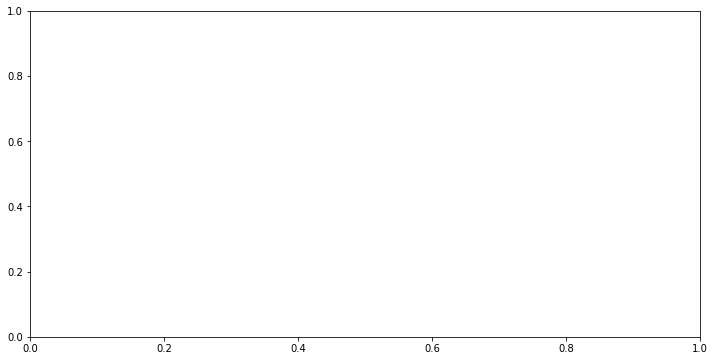

In [12]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', lablel='Original Price')
plt.plot(y_predicated, 'r', label='predicated price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicated, 'r', label='predicated price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
y_predicated
